# 椰林大道交通改善問卷

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('RoyalPalmBolv_traffic.csv')

In [3]:
col = df.columns
col_rename_dict = {
    '時間戳記': 'timecode',
    '請問您目前的身份是？': 'identity',
    '若您為在校生，請問您目前的年級為？': 'grade',
    '請問您在校內主要的移動方式／交通工具為何？': 'transportation',
    '騎乘交通工具行經椰林大道時，您通常會選擇以下何種路線？': 'biker_1',
    '請問您對於以下敘述的認同程度？ [機動車輛的行駛路線經常變動，使我難以維持原有的騎乘路線]': 'biker_2',
    '請問您對於以下敘述的認同程度？ [椰林大道上的機動車輛使我被迫加速]': 'biker_3',
    '請問您對於以下敘述的認同程度？ [椰林大道上的機動車輛使我騎乘交通工具時感到危險]': 'biker_4',
    '您在椰林大道「發生車禍」的頻率？': 'biker_5',
    '您在椰林大道「幾乎要發生車禍，但是因閃避即時而未有事故」的頻率？': 'biker_6',
    '若您曾經在椰林大道上發生／即將發生過車禍，歡迎您提供當下狀況的簡短描述及改善意見：': 'biker_7',
    '我認為「縮減機動車的車道寬度」有助於改善交通工具騎士的安全': 'impro_1',
    '我認為「縮減機動車的車道寬度」有助於改善行人的安全': 'impro_2',
    '承上題，若您認為縮減機動車道寬度有助於改善騎士／行人安全，則您覺得以下何種方法較適當？': 'impro_3',
    '步行經過椰林大道時，您通常會選擇以下何種路線？': 'pedes_1',
    '若您前一題選擇「椰子樹下的磚造人行道」以外的選項，原因是？': 'pedes_2',
    '請問您對於以下敘述的認同程度？ [我必須要時時注意路況，才不會被自行車／機動車撞到]': 'pedes_3',
    '請問您對於以下敘述的認同程度？ [我經常被突然竄出的自行車／機動車嚇到]': 'pedes_4',
    '若您曾經在椰林大道與各式交通工具發生車禍，歡迎您提供當下狀況的簡短描述及改善意見：': 'pedes_5',
    '請問您對於以下敘述的認同程度？ [目前椰林大道的夜間照明足夠讓我看清楚路上的來車]': 'night_1',
    '請問您對於以下敘述的認同程度？ [目前椰林大道的夜間照明足夠讓我感到安心]': 'night_2',
    '您對於椰林大道交通的任何想法？': 'comment_1',
    '您對於校內整體交通環境的任何想法？': 'comment_2'
}

df.rename(col_rename_dict, axis=1, inplace=True)

In [4]:
df['id'] = range(0, len(df))

In [5]:
df.loc[df['transportation'].str.contains('步行'), 'transportation'] = '步行'
df.loc[df['transportation']==('開車'), 'transportation'] = '小客車'

In [6]:
df[['biker_5', 'biker_6']] = df[['biker_5', 'biker_6']].replace({
    '幾乎不曾遇過': 1,
    '偶爾（每半年一次以上）': 2,
    '經常（每月一次以上）': 3,
    '總是（每週一次以上）': 4
})

- 去除步行者的「交通工具路線選擇」填答
- 去除步行走人行道者的「不走人行道理由」填達

In [7]:
df.loc[df['transportation'] == '步行', 'biker_1'] = np.nan
df.loc[df['pedes_1'] == '人行道', 'pedes_2'] = np.nan

In [8]:
route_code_vehicle = {
    '① 主線柏油路，靠車道右側、椰子樹旁騎乘': '主線右',
    '② 主線柏油路，在車道正中央騎乘': '主線中',
    '③ 主線柏油路，靠中央的黃色虛線騎乘': '主線左',
    '④ 椰子樹下的磚造人行道': '人行道',
    '⑤ 緊鄰兩側建築物的磚造馬路': '磚造路',
    '⑥ 我幾乎不會在椰林大道騎乘交通工具': '幾乎不騎乘'
}

df['biker_1'] = df['biker_1'].replace(route_code_vehicle)

route_code_pedes = {
    '① ② ③ 主線柏油路': '主線',
    '④ 椰子樹下的磚造人行道': '人行道',
    '⑤ 緊鄰兩側建築物的磚造馬路': '磚造路',
    '⑥ 我幾乎不會在椰林大道步行': '幾乎不步行'
}

df['pedes_1'] = df['pedes_1'].replace(route_code_pedes)
df = pd.get_dummies(df, columns=['biker_1', 'pedes_1'])

In [9]:
program_code = {
    '利用鋪面顏色設計，區隔車輛與行人空間（如上圖）': 'A_鋪面上色',
    '維持現有路面標線樣式（白線、雙黃線），僅縮減機動車道空間': 'A_標線縮減',
    '劃設鋸齒型標線引導車輛減速': 'A_鋸齒標線',
    '縮減車道無助改善騎士／行人安全': 'A_無助安全'
}

df_program = df.impro_3.str.get_dummies(sep=';').rename(program_code, axis=1)

custom_program = dict([(col, 'B_'+col) for col in df_program.columns if not col[:2] == 'A_'])

df_program.rename(custom_program, axis=1, inplace=True)
df_program = df_program.reindex(sorted(df_program.columns), axis=1)
df_program = df_program.add_prefix('impro_3_')

df = df.join(df_program).drop('impro_3', axis=1)

# Analysis

## 所有樣本對於各改善措施的支持率

<AxesSubplot:>

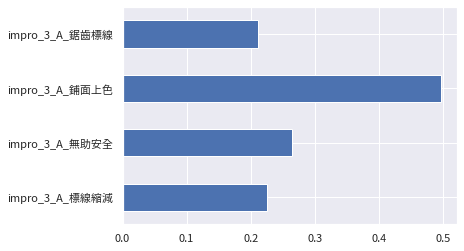

In [69]:
df[[col for col in df.columns if col[:9]=='impro_3_A']].mean().plot(kind='barh')

## 依身份別及交通工具分組對各改善措施的支持率

In [11]:
df_bike_pedes = df.loc[df['transportation'].isin(['自行車（含自有交通工具）', '步行'])]

df_bike_pedes.groupby(['identity', 'transportation'])[[col for col in df.columns if col[:9]=='impro_3_A']].agg([('支持率', lambda sr: '{:.2%}'.format(np.mean(sr))), ('人數', 'sum')])

impro_3_A_標線縮減     impro_3_A_無助安全      \
                                         支持率  人數            支持率  人數   
identity       transportation                                         
台大學生           步行                     25.00%   7         21.43%   6   
               自行車（含自有交通工具）           23.73%  42         26.55%  47   
台大教職員工         步行                      0.00%   0          0.00%   0   
               自行車（含自有交通工具）          100.00%   1          0.00%   0   
台科大／台師大／國北教大學生 步行                     50.00%   1          0.00%   0   
               自行車（含自有交通工具）            0.00%   0          0.00%   0   
校友             自行車（含自有交通工具）           14.29%   1         28.57%   2   
週邊居民           步行                      0.00%   0        100.00%   3   
               自行車（含自有交通工具）            0.00%   0         50.00%   1   

                              impro_3_A_鋪面上色     impro_3_A_鋸齒標線      
                                         支持率  人數            支持率  人數  
identity       transportation                                        
台大學生           步行                     60.71%  17         21.43%   6  
               自行車（含自有交通工具）           49.15%  87         19.21%  34  
台大教職員工         步行                      0.00%   0        100.00%   1  
               自行車（含自有交通工具）            0.00%   0          0.00%   0  
台科大／台師大／國北教大學生 步行                    100.00%   2          0.00%   0  
               自行車（含自有交通工具）           66.67%   2         66.67%   2  
校友             自行車（含自有交通工具）           57.14%   4         28.57%   2  
週邊居民           步行                      0.00%   0          0.00%   0  
               自行車（含自有交通工具）            0.00%   0          0.00%   0

In [72]:
df.groupby(['transportation'])[[col for col in df.columns if col[:9]=='impro_3_A']].agg([('支持率', lambda sr: '{:.2%}'.format(np.mean(sr))), ('人數', 'sum')])

impro_3_A_標線縮減     impro_3_A_無助安全     impro_3_A_鋪面上色      \
                          支持率  人數            支持率  人數            支持率  人數   
transportation                                                            
小客車                     0.00%   0         50.00%   1          0.00%   0   
步行                     23.53%   8         26.47%   9         55.88%  19   
滑板                      0.00%   0          0.00%   0        100.00%   1   
自行車（含自有交通工具）           23.16%  44         26.32%  50         48.95%  93   
電動平衡車／滑板車               0.00%   0         33.33%   1         33.33%   1   
電動輪椅                    0.00%   0          0.00%   0        100.00%   1   

               impro_3_A_鋸齒標線      
                          支持率  人數  
transportation                     
小客車                    50.00%   1  
步行                     20.59%   7  
滑板                    100.00%   1  
自行車（含自有交通工具）           20.00%  38  
電動平衡車／滑板車              33.33%   1  
電動輪椅                  100.00%   1

In [73]:
df.groupby(['transportation'])[[col for col in df.columns if col[:9]=='impro_3_A']].agg([('支持率', lambda sr: '{:.2%}'.format(np.mean(sr)))])

,impro_3_A_標線縮減,impro_3_A_無助安全,impro_3_A_鋪面上色,impro_3_A_鋸齒標線
,支持率,支持率,支持率,支持率
transportation,,,,
小客車,0.00%,50.00%,0.00%,50.00%
步行,23.53%,26.47%,55.88%,20.59%
滑板,0.00%,0.00%,100.00%,100.00%
自行車（含自有交通工具）,23.16%,26.32%,48.95%,20.00%
電動平衡車／滑板車,0.00%,33.33%,33.33%,33.33%
電動輪椅,0.00%,0.00%,100.00%,100.00%


若僅保留步行與自行車騎士的填答資料：

In [74]:
df_bike_pedes.groupby(['transportation'])[[col for col in df.columns if col[:9]=='impro_3_A']].agg([('支持率', lambda sr: '{:.2%}'.format(np.mean(sr))), ('人數', 'sum')])

impro_3_A_標線縮減     impro_3_A_無助安全     impro_3_A_鋪面上色      \
                          支持率  人數            支持率  人數            支持率  人數   
transportation                                                            
步行                     23.53%   8         26.47%   9         55.88%  19   
自行車（含自有交通工具）           23.16%  44         26.32%  50         48.95%  93   

               impro_3_A_鋸齒標線      
                          支持率  人數  
transportation                     
步行                     20.59%   7  
自行車（含自有交通工具）           20.00%  38

In [75]:
df_bike_pedes.groupby(['transportation'])[[col for col in df.columns if col[:9]=='impro_3_A']].agg([('支持率', lambda sr: '{:.2%}'.format(np.mean(sr)))])

,impro_3_A_標線縮減,impro_3_A_無助安全,impro_3_A_鋪面上色,impro_3_A_鋸齒標線
,支持率,支持率,支持率,支持率
transportation,,,,
步行,23.53%,26.47%,55.88%,20.59%
自行車（含自有交通工具）,23.16%,26.32%,48.95%,20.00%


In [13]:
df.groupby(['transportation'])[[col for col in df.columns if col[:7] in ['biker_1', 'pedes_1']]].agg([('比例', lambda x: '{:.2%}'.format(np.mean(x))), ('人數', 'sum')])

biker_1_主線中     biker_1_主線右      biker_1_主線左     biker_1_幾乎不騎乘  \
                        比例  人數          比例   人數          比例  人數            比例   
transportation                                                                  
小客車                 50.00%   1       0.00%    0      50.00%   1         0.00%   
步行                   0.00%   0       0.00%    0       0.00%   0         0.00%   
滑板                   0.00%   0     100.00%    1       0.00%   0         0.00%   
自行車（含自有交通工具）        32.63%  62      61.05%  116       5.26%  10         0.00%   
電動平衡車／滑板車           33.33%   1      33.33%    1       0.00%   0        33.33%   
電動輪椅                 0.00%   0     100.00%    1       0.00%   0         0.00%   

                  biker_1_磚造路    pedes_1_主線     pedes_1_人行道       \
               人數          比例 人數         比例  人數          比例   人數   
transportation                                                     
小客車             0       0.00%  0      0.00%   0      50.00%    1   
步行              0       0.00%  0     35.29%  12      47.06%   16   
滑板              0       0.00%  0      0.00%   0     100.00%    1   
自行車（含自有交通工具）    0       1.05%  2     18.42%  35      54.74%  104   
電動平衡車／滑板車       1       0.00%  0      0.00%   0      33.33%    1   
電動輪椅            0       0.00%  0      0.00%   0     100.00%    1   

               pedes_1_幾乎不步行     pedes_1_磚造路      
                          比例  人數          比例  人數  
transportation                                    
小客車                   50.00%   1       0.00%   0  
步行                     0.00%   0      17.65%   6  
滑板                     0.00%   0       0.00%   0  
自行車（含自有交通工具）           6.84%  13      20.00%  38  
電動平衡車／滑板車              0.00%   0      66.67%   2  
電動輪椅                   0.00%   0       0.00%   0

## Visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.font_manager import _rebuild
_rebuild()

In [15]:
biker_columns_dict = [(col, col[8:]) for col in df.columns if col[:7] in ['biker_1']]
pedes_columns_dict = [(col, col[8:]) for col in df.columns if col[:7] in ['pedes_1']]

df_route_biker = df_bike_pedes.rename(dict(biker_columns_dict), axis=1).groupby(['transportation'])[[col[1] for col in biker_columns_dict]].agg('mean')
df_route_pedes = df_bike_pedes.rename(dict(pedes_columns_dict), axis=1).groupby(['transportation'])[[col[1] for col in pedes_columns_dict]].agg('mean')

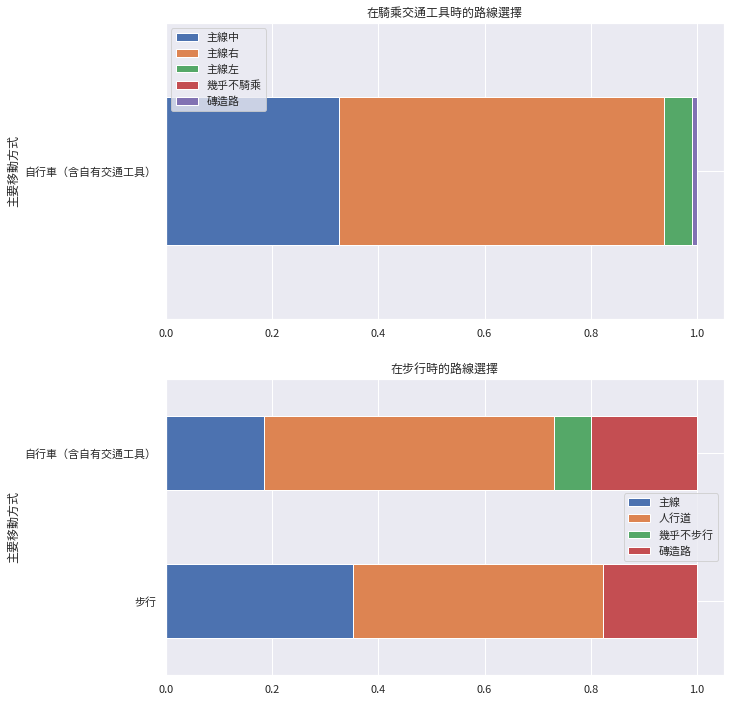

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

sns.set(font='Taipei Sans TC Beta')

df_route_biker.loc[['自行車（含自有交通工具）']].plot(kind='barh', stacked=True, ax=axes[0], title='在騎乘交通工具時的路線選擇',)
df_route_pedes.plot(kind='barh', stacked=True, ax=axes[1], title='在步行時的路線選擇')

axes[0].set(ylabel='主要移動方式')
axes[1].set(ylabel='主要移動方式')

fig.savefig('route_fig.svg')
plt.show()

## 其他改善方法建議

In [59]:
[col[10:] for col in df.columns if col[:9] == 'impro_3_B']

['1利用景觀手法（加種喬木灌木），分隔車道，增加視線阻礙，使車輛被迫減速。2重新設計非周線性道路，或中央設計分隔島',
 '不同鋪面/立體區隔',
 '中央柏油路改為人車共道路型',
 '但我覺得問題常常是例如腳踏車要轉彎，就勢必要騎到中間，這種時候就很可能會被車撞…',
 '做好監管確保機動車輛遵守台大校內交通規定',
 '取締超速，我不想要在台大騎車還要兩段式左轉。',
 '只有特許機動車(如餐廳、便利商店)才能進入台大，其他車輛一律禁止進入。檢查及妥善保養椰林大道上的監視器，如有違規行為須取締並罰款，如多次違規(超速、逼腳踏車、逼人等)，取消特許進入的權利',
 '增加超速機動車的執法率',
 '增設腳踏車道，中間隔安全導以確保機動車輛不會越線，只區分顏色會違規的還是會違規。',
 '實體人行道往道路中央蓋出來、在幾個行人穿越數較多處劃設斑馬線引導',
 '或許也不用改變？(其他方法還沒想到) 只是因為上圖鋪面設計顏色好像有點太強眼，覺得日後椰林大道上的椰林因此失真...',
 '效仿荷蘭，整個改成紅磚色鋪面，表示校內是行人與自行車的主場，機動車輛為客體',
 '無縮減',
 '直接拓寬人行道，用實體阻隔或路緣的高低差區隔行人與車輛',
 '禁行汽車',
 '車道設置減速設施',
 '限制機動車輛進入校園']

## 不喜歡使用人行道的原因

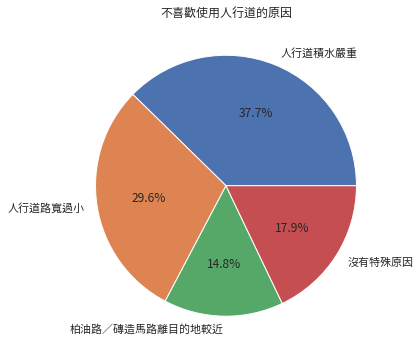

In [21]:
df_pedes_2 = df.pedes_2.str.get_dummies(sep=';').sum()

fig, axes = plt.subplots(1, 1, figsize=(6, 6))

df_pedes_2.loc[df_pedes_2 > 2].plot(kind='pie', ax=axes, ylabel='', autopct='%.1f%%')
axes.set(title='不喜歡使用人行道的原因')

fig.savefig('df_pedes_2.svg')
plt.show()

## 椰林大道騎乘感受

,biker_2,biker_3,biker_4
count,200.000000,200.000000,200.000000
mean,3.140000,3.255000,3.770000
std,1.244243,1.344998,1.258978
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000
50%,3.000000,3.000000,4.000000
75%,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000


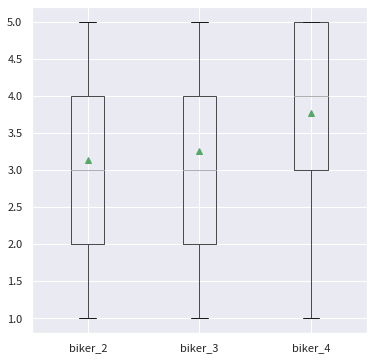

In [63]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

axes.set()
display(df[['biker_2', 'biker_3', 'biker_4']].describe())
df[['biker_2', 'biker_3', 'biker_4']].boxplot(ax=axes, showmeans=True)
fig.savefig('biker_2_3_4.svg')
plt.show()

,pedes_3,pedes_4
count,231.000000,231.000000
mean,3.493506,3.393939
std,1.257569,1.192643
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,4.000000
max,5.000000,5.000000


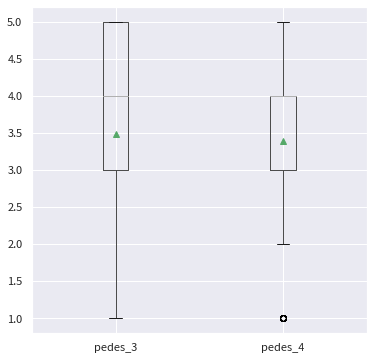

In [62]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

axes.set()
display(df[['pedes_3', 'pedes_4']].describe())
df[['pedes_3', 'pedes_4']].boxplot(ax=axes, showmeans=True)
fig.savefig('pedes_3_4.svg')
plt.show()

,night_1,night_2
count,231.000000,231.00000
mean,2.913420,2.78355
std,1.292568,1.27036
min,1.000000,1.00000
25%,2.000000,2.00000
50%,3.000000,3.00000
75%,4.000000,4.00000
max,5.000000,5.00000


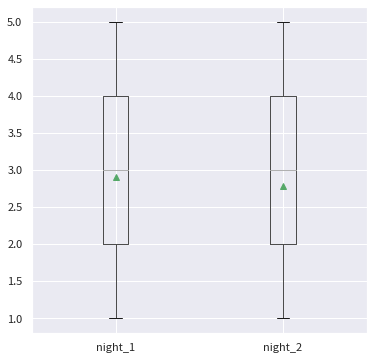

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

axes.set()
display(df[['night_1', 'night_2']].describe())
df[['night_1', 'night_2']].boxplot(ax=axes, showmeans=True)
fig.savefig('night_1_2.svg')
plt.show()